**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Prepare

**Set global variable**

In [2]:
TXT_FNAME_INP = "region.annotation.fcc_starrmpracrispr.assayvote.tsv"
TXT_FNAME_OUT = "region.annotation.genome_tss.tsv"

**View files**

In [3]:
### get annotated region folder
txt_fdiry = file.path(FD_RES, "region_annotation")
vec = dir(txt_fdiry)
names(vec) = vec

### assign and show
vec_txt_folder = vec
for(txt in vec){cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [4]:
txt_fdiry = file.path(FD_RES, "region_annotation", "*", "summary")
txt_fname = TXT_FNAME_INP
txt_fglob = file.path(txt_fdiry, txt_fname)

vec = Sys.glob(txt_fglob)
for(txt in vec){cat(txt, "\n")}

/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_overlap/summary/region.annotation.fcc_starrmpracrispr.assayvote.tsv 
/data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results/region_annotation/fcc_astarr_macs_input_union/summary/region.annotation.fcc_starrmpracrispr.assayvote.tsv 


## Import data

In [14]:
lst = lapply(vec_txt_folder, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    txt_fname = "region.annotation.fcc_starrmpracrispr.concat.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_folder

### assign and show
lst_dat_region_annot_fcc_concat_import = lst
res = lapply(lst, dim)
print(res)
dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 156686      6

$fcc_astarr_macs_input_union
[1] 201420      6



Chrom,ChromStart,ChromEnd,Region,Group,Label
chr1,10038,10405,chr1:10038-10405,ASTARR,ASTARR_R
chr1,16025,16338,chr1:16025-16338,ASTARR,ASTARR_R
chr1,17288,17689,chr1:17288-17689,ASTARR,ASTARR_R


In [5]:
lst = lapply(vec_txt_folder, function(txt_folder){
    ### set file directory
    txt_fdiry = file.path(
        FD_RES, 
        "region_annotation", 
        txt_folder,
        "summary"
    )
    txt_fname = "region.annotation.fcc_starrmpracrispr.assayvote.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})
names(lst) = vec_txt_folder

### assign and show
lst_dat_region_annot_fcc_assayvote_import = lst
res = lapply(lst, dim)
print(res)
dat = lst[[1]]
fun_display_table(head(dat, 3))

$fcc_astarr_macs_input_overlap
[1] 100454      6

$fcc_astarr_macs_input_union
[1] 135780      6



Chrom,ChromStart,ChromEnd,Region,Num_Assay,Assays
chr1,10038,10405,chr1:10038-10405,1,ASTARR
chr1,16025,16338,chr1:16025-16338,1,ASTARR
chr1,17288,17689,chr1:17288-17689,1,ASTARR


In [7]:
lst = lst_dat_region_annot_fcc_assayvote_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::mutate(Note = paste0("N", Num_Assay))
    res = table(dat$Note, dnn=c("Note"))
    dat = as.data.frame(res)
    return(dat)
})

dat = bind_rows(lst, .id = "Region")
dat = dat %>% tidyr::spread(Note, Freq) #%>% dplyr::mutate(Total = sum(N1:N7))
fun_display_table(dat)

Region,N1,N2,N3,N4,N5,N6,N7
fcc_astarr_macs_input_overlap,66501,22994,9740,1177,31,6,5
fcc_astarr_macs_input_union,95992,28122,10384,1237,34,6,5


In [9]:
lst = lst_dat_region_annot_fcc_assayvote_import
lst = lapply(lst, function(dat){
    dat = dat %>% dplyr::filter(Num_Assay > 1)
    vec = unique(dat$Region)
    num = length(vec)
    return(num)
})

print(lst)

$fcc_astarr_macs_input_overlap
[1] 33953

$fcc_astarr_macs_input_union
[1] 39788



In [11]:
lst = lst_dat_region_annot_fcc_assayvote_import
dat = lst[[1]]
head(dat)

Chrom,ChromStart,ChromEnd,Region,Num_Assay,Assays
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
chr1,10038,10405,chr1:10038-10405,1,ASTARR
chr1,16025,16338,chr1:16025-16338,1,ASTARR
chr1,17288,17689,chr1:17288-17689,1,ASTARR
chr1,28934,29499,chr1:28934-29499,1,ASTARR
chr1,115429,115969,chr1:115429-115969,1,ASTARR
chr1,136201,137353,chr1:136201-137353,1,ASTARR


In [15]:
lst = lst_dat_region_annot_fcc_assayvote_import
dat = lst[[1]]
dat = dat %>% dplyr::filter(Num_Assay > 1)
vec = unique(dat$Region)

vec_txt_region = vec
print(length(vec))

[1] 33953


In [18]:
fun = function(vec_txt_input){
    vec_txt_pattern = c("STARR", "MPRA", "CRISPR", "E2G")
    vec_txt_replace = c("STARR", "MPRA", "CRISPR", "CRISPR")
    vec_txt_output = fun_str_map_detect(
        vec_txt_input, 
        vec_txt_pattern,
        vec_txt_replace
    )
    return(vec_txt_output)
}

fun(c("ASTARR", "WSTARR", "TMPRA", "LMPRA", "CRISPRi-HCRFF", "CRISPRi-Growth", "E2G-Benchmark"))

[1] "STARR"  "STARR"  "MPRA"   "MPRA"   "CRISPR" "CRISPR" "CRISPR"

In [20]:
lst = lst_dat_region_annot_fcc_concat_import
dat = lst[[1]]
dat = dat %>% 
    dplyr::filter(Region %in% vec_txt_region) %>%
    dplyr::mutate(Group = fun(Group)) %>%
    dplyr::select(Region, Group) %>% 
    dplyr::distinct()

#vec_txt_region = vec
#print(length(vec))

dat_region_annot = dat
print(dim(dat))
head(dat)

[1] 56327     2


Region,Group
<chr>,<chr>
chr1:605104-605675,STARR
chr1:778233-779389,STARR
chr1:778233-779389,MPRA
chr1:818708-819335,STARR
chr1:826796-828040,STARR
chr1:842516-843431,STARR


In [10]:
library(UpSetR)

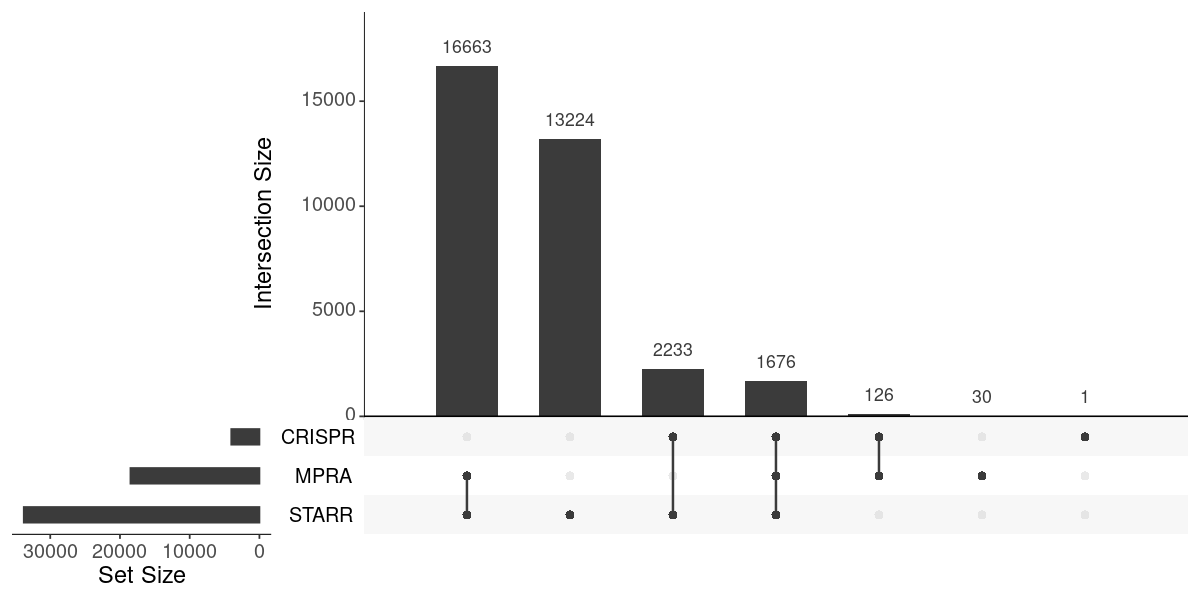

In [21]:
dat = dat_region_annot
lst = split(dat$Region, dat$Group)

options(repr.plot.height=5, repr.plot.width=10)
upset(fromList(lst), order.by = "freq", text.scale=1.7)